In [64]:
import pandas as pd
import numpy as np 

## import data 

In [65]:
df=pd.read_excel("Rotten_Tomatoes_Movies3.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [66]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


## feature selection and EDA

In [67]:
data=df.drop(columns=['cast','writers','directors','genre','critics_consensus','movie_info','movie_title','in_theaters_date','on_streaming_date','studio_name'])

In [68]:
data.isnull().sum()

rating                  0
runtime_in_minutes    155
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating       252
dtype: int64

In [69]:
data.dropna(how='any',inplace=True)

In [70]:
# data['runtime_in_minutes'].fillna(data['runtime_in_minutes'].mean(),inplace=True)

In [71]:
# data['audience_rating'].fillna(data['audience_rating'].mean(),inplace=True)

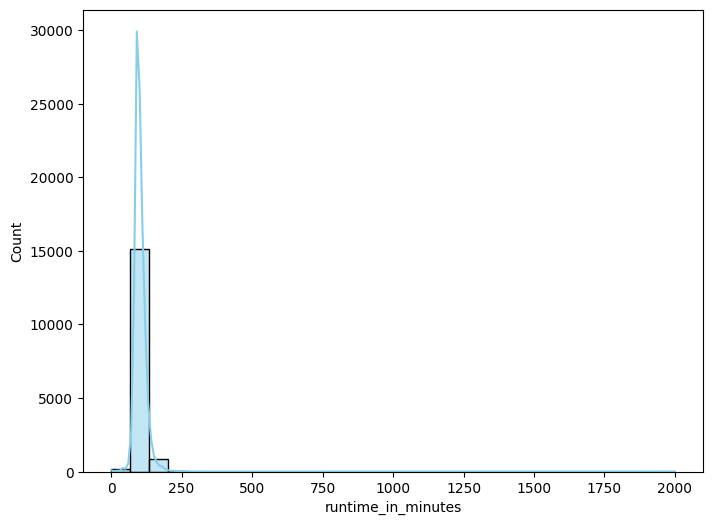

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(data['runtime_in_minutes'], bins=30, kde=True, color='skyblue')
plt.show()

In [62]:
data['rating'].unique()

array([1., 3., 5., 0., 2., 4.])

In [73]:
data['rating'] = data['rating'].apply(lambda x: ''.join([char for char in x if char != ')']))


In [74]:
data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [178]:
data['tomatometer_status'].unique()

array(['Rotten', 'Certified Fresh', 'Fresh'], dtype=object)

In [179]:
data

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,PG,83.0,Rotten,49,144,53.0
1,R,90.0,Certified Fresh,86,140,64.0
2,R,118.0,Fresh,68,22,53.0
3,NR,95.0,Certified Fresh,100,51,97.0
4,G,127.0,Fresh,89,27,74.0
...,...,...,...,...,...,...
16633,R,104.0,Rotten,56,9,74.0
16634,PG,108.0,Certified Fresh,97,279,92.0
16635,NR,142.0,Fresh,78,9,87.0
16636,PG,139.0,Fresh,95,21,91.0


### feature transformation

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16239 entries, 0 to 16637
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              16239 non-null  object 
 1   runtime_in_minutes  16239 non-null  float64
 2   tomatometer_status  16239 non-null  object 
 3   tomatometer_rating  16239 non-null  int64  
 4   tomatometer_count   16239 non-null  int64  
 5   audience_rating     16239 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 888.1+ KB


In [16]:
categories=[['G', 'PG', 'PG-13', 'R', 'NC17', 'NR']]
categories
encoder=OrdinalEncoder(categories=categories)
data['rating']=encoder.fit_transform(data[['rating']])

In [17]:
categories=[['Rotten', 'Fresh' ,'Certified Fresh']]
encoder=OrdinalEncoder(categories=categories)
data['tomatometer_status']=encoder.fit_transform(data[['tomatometer_status']])

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16239 entries, 0 to 16637
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              16239 non-null  float64
 1   runtime_in_minutes  16239 non-null  float64
 2   tomatometer_status  16239 non-null  float64
 3   tomatometer_rating  16239 non-null  int64  
 4   tomatometer_count   16239 non-null  int64  
 5   audience_rating     16239 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 888.1 KB


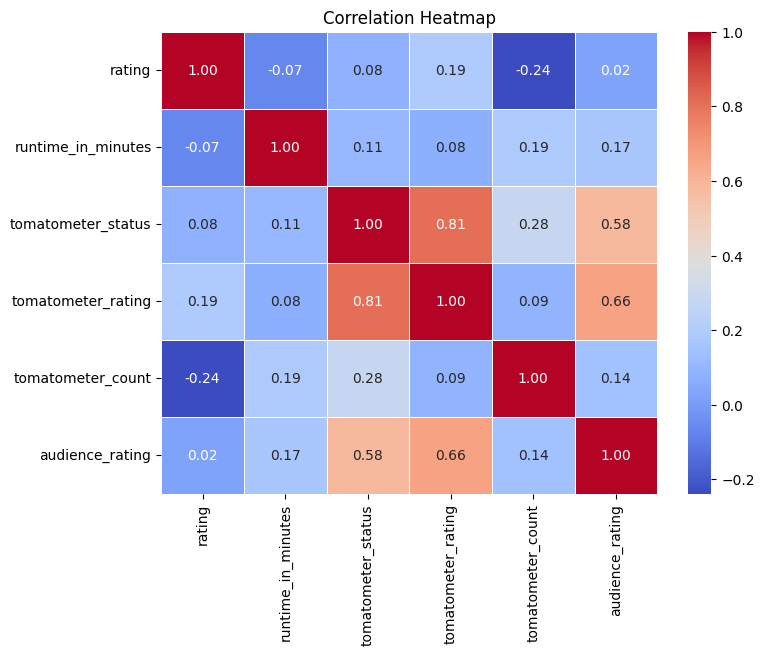

In [186]:
corr_matrix = data.corr()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')  # Optional: Set the title
plt.show()

In [187]:
data.describe()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
count,16239.000000,16239.000000,16239.000000,16239.000000,16239.000000,16239.000000
mean,3.020321,102.563520,0.745674,60.455324,57.025433,60.521153
std,1.473987,25.039112,0.742563,28.569682,66.306572,20.443700
min,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,2.000000,90.000000,0.000000,38.000000,12.000000,45.000000
50%,3.000000,99.000000,1.000000,66.000000,29.000000,63.000000
75%,5.000000,111.000000,1.000000,86.000000,77.000000,78.000000
max,5.000000,2000.000000,2.000000,100.000000,497.000000,100.000000


In [188]:
import pandas as pd
from ydata_profiling import ProfileReport


## splitting dependent and independent variable

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0        53.0
1        64.0
2        53.0
3        97.0
4        74.0
         ... 
16633    74.0
16634    92.0
16635    87.0
16636    91.0
16637    62.0
Name: audience_rating, Length: 16239, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11367, 5) (11367,)
(4872, 5) (4872,)


### feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_transformed = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)

print(x_train_transformed.shape)

(11367, 5)


In [21]:
x_test_transformed = pd.DataFrame(scaler.fit_transform(x_test),columns=x_train.columns)

## model building

### linear Regression

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3) 
rfe.fit(x_train_transformed, y_train)



RFE(estimator=LinearRegression(), n_features_to_select=3)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
model1.fit(x_train,y_train)
model1.coef_
y_pred = model1.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse



223.92964741383912

In [226]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.4712809541130092

In [199]:
ranking = rfe.ranking_
ranking

array([1, 2, 1, 1, 3])

In [227]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

rfe = RFE(estimator=model, n_features_to_select=3) 
rfe.fit(x_train_transformed, y_train)

selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")

# Train the model with the selected features
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
model.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Selected Features: list[Index(['rating', 'tomatometer_status', 'tomatometer_rating'], dtype='object')]


0.4548071953957362

### ridge

In [228]:
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1.0)
rfe = RFE(estimator=ridge_model, n_features_to_select=3) 
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
ridge_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['rating', 'tomatometer_status', 'tomatometer_rating'], dtype='object')]


0.45480571135013337

### lasso

In [81]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

# Initialize the model
lasso_model = Lasso(alpha=0.4)
rfe = RFE(estimator=lasso_model, n_features_to_select=3) 
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
lasso_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating'], dtype='object')]


0.4640906439139133

### ElasticNet

In [238]:
from sklearn.linear_model import ElasticNet

# Initialize the model
ElasticNet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
rfe = RFE(estimator=ElasticNet_model, n_features_to_select=5) 
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
ElasticNet_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = ElasticNet_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['rating', 'runtime_in_minutes', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count'],
      dtype='object')]


0.47001895727276544

### decison tree

In [240]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dtr_model = DecisionTreeRegressor(random_state=40)
rfe = RFE(estimator=dtr_model, n_features_to_select=4) 
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
dtr_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = dtr_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['rating', 'runtime_in_minutes', 'tomatometer_rating',
       'tomatometer_count'],
      dtype='object')]


-0.029713786655443553

### ensmeble models

In [247]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=40,n_estimators=100)#
rfe = RFE(estimator=rf_model, n_features_to_select=4) #
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
rf_model.fit(X_train_selected, y_train) #

# Make predictions
y_pred = rf_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['rating', 'runtime_in_minutes', 'tomatometer_rating',
       'tomatometer_count'],
      dtype='object')]


0.43400585188345076

In [250]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=40,n_estimators=100)#
rfe = RFE(estimator=gbr_model, n_features_to_select=4) #
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
gbr_model.fit(X_train_selected, y_train) #

# Make predictions
y_pred = gbr_model.predict(X_test_selected)#
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['rating', 'runtime_in_minutes', 'tomatometer_rating',
       'tomatometer_count'],
      dtype='object')]


0.49520254785477735

In [253]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
ada_model = AdaBoostRegressor(random_state=50,n_estimators=100)#
rfe = RFE(estimator=ada_model, n_features_to_select=3) #
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
ada_model.fit(X_train_selected, y_train) #

# Make predictions
y_pred = ada_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count'], dtype='object')]


0.45506794200519984

In [256]:
import lightgbm as lgb
# Initialize the model
lgb_model = lgb.LGBMRegressor(random_state=50,n_estimators=100)#
rfe = RFE(estimator=lgb_model, n_features_to_select=3) #
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
lgb_model.fit(X_train_selected, y_train) #

# Make predictions
y_pred = lgb_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 11367, number of used features: 5
[LightGBM] [Info] Start training from score 60.725961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 11367, number of used features: 4
[LightGBM] [Info] Start training from score 60.725961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 1

0.4736651197809896

In [280]:
import xgboost as xgb
# Initialize the model
xgb_model = xgb.XGBRegressor(random_state=50,n_estimators=100)#
rfe = RFE(estimator=xgb_model, n_features_to_select=3) #
rfe.fit(x_train_transformed, y_train)
selected_features = x.columns[rfe.support_]

print(f"Selected Features: {list[selected_features]}")
# Train the model
X_train_selected = x_train_transformed[selected_features]
X_test_selected = x_test_transformed[selected_features]
xgb_model.fit(X_train_selected, y_train) #

# Make predictions
y_pred = xgb_model.predict(X_test_selected)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



Selected Features: list[Index(['runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating'], dtype='object')]


0.40894099411923035

### knn

In [271]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=7)#
# rfe = RFE(estimator=knn_model, n_features_to_select=3) #
# rfe.fit(x_train_transformed, y_train)
# selected_features = x.columns[rfe.support_]

# print(f"Selected Features: {list[selected_features]}")
# # Train the model
# X_train_selected = x_train_transformed[selected_features]
# X_test_selected = x_test_transformed[selected_features]
knn_model.fit(x_train_transformed, y_train) #

# Make predictions
y_pred = knn_model.predict(x_test_transformed)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



0.447021658863055

### svr

In [265]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')#

svr_model.fit(x_train_transformed[['rating','tomatometer_rating']], y_train) #

# Make predictions
y_pred = svr_model.predict(x_test_transformed[['rating','tomatometer_rating']])
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



0.453732444721925

### svr with gridsearchCV

In [282]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_transformed, y_train)
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test_transformed)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.4852431680172845

### just trying

In [294]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(nx,y_train)
y_pred=model.predict(x_test[['rating','tomatometer_rating']])
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


0.4522578479559215

In [293]:
nx=x_train[['rating','tomatometer_rating']]

In [289]:
x_train

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count
9621,2.0,115.0,2.0,89,147
10528,5.0,96.0,1.0,94,35
7463,3.0,94.0,1.0,61,108
13546,3.0,67.0,1.0,77,13
2127,3.0,93.0,1.0,67,12
...,...,...,...,...,...
13418,5.0,139.0,1.0,80,20
3310,5.0,121.0,1.0,76,25
10054,2.0,104.0,0.0,52,101
11038,3.0,82.0,0.0,57,14


### regression with ANN

Epoch 1/50
356/356 [==============================] - 1s 2ms/step - loss: 0.5592 - mae: 0.5944 - val_loss: 0.5216 - val_mae: 0.5733
Epoch 2/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5226 - mae: 0.5728 - val_loss: 0.5269 - val_mae: 0.5819
Epoch 3/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5104 - mae: 0.5669 - val_loss: 0.5279 - val_mae: 0.5847
Epoch 4/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5096 - mae: 0.5667 - val_loss: 0.5163 - val_mae: 0.5683
Epoch 5/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5075 - mae: 0.5650 - val_loss: 0.5157 - val_mae: 0.5714
Epoch 6/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5079 - mae: 0.5651 - val_loss: 0.5169 - val_mae: 0.5728
Epoch 7/50
356/356 [==============================] - 0s 1ms/step - loss: 0.5061 - mae: 0.5650 - val_loss: 0.5158 - val_mae: 0.5623
Epoch 8/50
356/356 [==============================] - 0s 1ms/step - loss: 0.

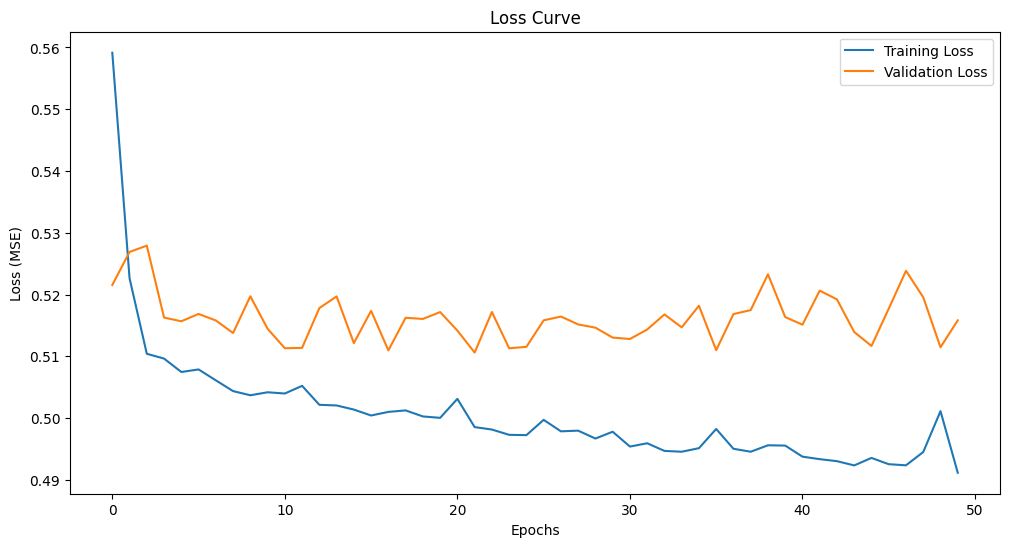

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1)).flatten()
# y_train_scaled = np.array(y_train).reshape(-1, 1).flatten()
# y_test_scaled = np.array(y_test).reshape(-1, 1).flatten()

# Build the ANN model
model = Sequential([
    Dense(64, input_dim=x_train_transformed.shape[1], activation='relu'),
  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer (for regression, single output)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse',metrics=['mae'])

# Train the model
history = model.fit(x_train_transformed, y_train_scaled, 
                    validation_data=(x_test_transformed, y_test_scaled,), 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

# Predict on test set
y_pred_scaled = model.predict(x_test_transformed)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [134]:
x_train_transformed

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count
0,-0.688953,0.461196,1.682811,0.990870,1.358226
1,1.346921,-0.245770,0.333928,1.166392,-0.336216
2,-0.010328,-0.320188,0.333928,0.007946,0.768197
3,-0.010328,-1.324824,0.333928,0.569617,-0.669053
4,-0.010328,-0.357397,0.333928,0.218573,-0.684182
...,...,...,...,...,...
11362,1.346921,1.354206,0.333928,0.674930,-0.563150
11363,1.346921,0.684449,0.333928,0.534513,-0.487506
11364,-0.688953,0.051900,-1.014955,-0.307994,0.662294
11365,-0.010328,-0.766693,-1.014955,-0.132472,-0.653924


In [94]:
model.save('ann_model.h5')  


c:\Users\chinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
import joblib
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [135]:
import joblib
joblib.dump(scaler_y,'scaler_y.h5')

['scaler_y.h5']

### conclusion - Since ann model got highest of all other model with r2 score of ~0.49 we are going to use ann model for prediction

In [133]:
from tensorflow.keras.models import load_model
import joblib 

scaler=joblib.load('scaler.h5')
loaded_model = load_model('ann_model.h5')
example=pd.DataFrame([2.,90.,3.,100,70]).T
example=scaler.transform(example)
# Use the loaded model for predictions or further training
y_pred = loaded_model.predict(example)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred


1/1 [==============================] - 0s 66ms/step


c:\Users\chinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[81.23305]], dtype=float32)